In [1]:
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.utils import load_img,array_to_img, img_to_array
from PIL import Image
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import L1, L2, L1L2
from keras.models import Model, Sequential, load_model
from keras.layers import Dropout, BatchNormalization
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten,GlobalAveragePooling2D, Reshape, Input, Average
from keras.callbacks import EarlyStopping
from keras.preprocessing import image
from keras.applications import DenseNet121, DenseNet201, ResNet152, VGG19
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
!kaggle datasets download jehanbhathena/weather-dataset

Dataset URL: https://www.kaggle.com/datasets/jehanbhathena/weather-dataset
License(s): CC0-1.0
100% 587M/587M [00:30<00:00, 22.1MB/s]
100% 587M/587M [00:30<00:00, 20.4MB/s]


In [3]:
!unzip /content/weather-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/frost/3913.jpg  
  inflating: dataset/frost/3914.jpg  
  inflating: dataset/frost/3915.jpg  
  inflating: dataset/frost/3916.jpg  
  inflating: dataset/frost/3917.jpg  
  inflating: dataset/frost/3918.jpg  
  inflating: dataset/frost/3919.jpg  
  inflating: dataset/frost/3920.jpg  
  inflating: dataset/frost/3921.jpg  
  inflating: dataset/frost/3922.jpg  
  inflating: dataset/frost/3923.jpg  
  inflating: dataset/frost/3924.jpg  
  inflating: dataset/frost/3925.jpg  
  inflating: dataset/frost/3926.jpg  
  inflating: dataset/frost/3927.jpg  
  inflating: dataset/frost/3928.jpg  
  inflating: dataset/frost/3929.jpg  
  inflating: dataset/frost/3930.jpg  
  inflating: dataset/frost/3931.jpg  
  inflating: dataset/frost/3932.jpg  
  inflating: dataset/frost/3933.jpg  
  inflating: dataset/frost/3934.jpg  
  inflating: dataset/frost/3935.jpg  
  inflating: dataset/frost/3936.jpg  
  inflating: dataset/frost/3937.jpg  

In [4]:
!cd /content/dataset
!mkdir /content/dataset/train /content/dataset/test
!mkdir /content/dataset/train/dew /content/dataset/train/fogsmog /content/dataset/train/frost /content/dataset/train/glaze /content/dataset/train/hail /content/dataset/train/lightning /content/dataset/train/rain /content/dataset/train/rainbow /content/dataset/train/rime /content/dataset/train/sandstorm /content/dataset/train/snow
!mkdir /content/dataset/test/dew /content/dataset/test/fogsmog /content/dataset/test/frost /content/dataset/test/glaze /content/dataset/test/hail /content/dataset/test/lightning /content/dataset/test/rain /content/dataset/test/rainbow /content/dataset/test/rime /content/dataset/test/sandstorm /content/dataset/test/snow

In [5]:
import os


path = "/content/dataset/"
for dirpath, dirnames, filenames in os.walk(path):
    directory_level = dirpath.replace(path, "")
    directory_level = directory_level.count(os.sep)
    indent = " " * 4
    print("{}{}/".format(indent*directory_level, os.path.basename(dirpath)))

    for f in filenames:
        print("{}{}".format(indent*(directory_level+1), f))

Streaming output truncated to the last 5000 lines.
    6144.jpg
    6496.jpg
    6618.jpg
    6604.jpg
    6330.jpg
    6219.jpg
    6247.jpg
    6475.jpg
    6354.jpg
    6365.jpg
    6226.jpg
    6521.jpg
    6508.jpg
    6379.jpg
    6391.jpg
    6316.jpg
    6621.jpg
    6445.jpg
    6317.jpg
    6489.jpg
    6523.jpg
    6347.jpg
    6318.jpg
    6590.jpg
    6334.jpg
    6130.jpg
    6519.jpg
    6284.jpg
    6640.jpg
    6397.jpg
    6415.jpg
    6412.jpg
    6186.jpg
    6450.jpg
    6218.jpg
    6573.jpg
    6137.jpg
    6723.jpg
    6443.jpg
    6467.jpg
    6560.jpg
    6304.jpg
    6111.jpg
    6566.jpg
    6188.jpg
    6476.jpg
    6210.jpg
    6141.jpg
    6541.jpg
    6429.jpg
    6255.jpg
    6577.jpg
    6571.jpg
    6113.jpg
    6539.jpg
    6588.jpg
    6408.jpg
    6139.jpg
    6558.jpg
    6524.jpg
    6275.jpg
    6252.jpg
    6362.jpg
    6091.jpg
    6220.jpg
    6658.jpg
    6507.jpg
    6127.jpg
    6385.jpg
    6657.jpg
    6427.jpg
    6441.jpg
    6336.jpg


In [6]:
import random
import shutil


types = ['fogsmog', 'hail', 'dew', 'sandstorm', 'rime', 'frost', 'rainbow', 'glaze', 'rain', 'snow', 'lightning']

for t in types:
    origin = '/content/dataset/' + t + '/'
    for root, dirs, files in os.walk(origin):
        random.shuffle(files)
        train_list = files[:int((0.8)*len(files))]
        test_list = files[int((0.8)*len(files)):]
        for f in train_list:
            shutil.copy(origin+f, '/content/dataset/train/' + t + '/' +f)
        for f in test_list:
            shutil.copy(origin+f, '/content/dataset/test/' + t + '/' +f)

In [7]:
print("TRAIN DATASET")
print("_____________")
sum = 0
for root, dirs, files in os.walk('/content/dataset/train/'):
    if files != []:
        print(root, "-->", len(files))
        sum += len(files)

print("_____________")
print("TOTAL = ", sum)
print()
print()


print("TEST DATASET")
print("_____________")
sum = 0
for root, dirs, files in os.walk('/content/dataset/test/'):
    if files != []:
        print(root, "-->", len(files))
        sum += len(files)

print("_____________")
print("TOTAL = ", sum)
print()

TRAIN DATASET
_____________
/content/dataset/train/sandstorm --> 553
/content/dataset/train/lightning --> 301
/content/dataset/train/rain --> 420
/content/dataset/train/glaze --> 511
/content/dataset/train/frost --> 380
/content/dataset/train/rime --> 928
/content/dataset/train/snow --> 496
/content/dataset/train/rainbow --> 185
/content/dataset/train/dew --> 558
/content/dataset/train/fogsmog --> 680
/content/dataset/train/hail --> 472
_____________
TOTAL =  5484


TEST DATASET
_____________
/content/dataset/test/sandstorm --> 139
/content/dataset/test/lightning --> 76
/content/dataset/test/rain --> 106
/content/dataset/test/glaze --> 128
/content/dataset/test/frost --> 95
/content/dataset/test/rime --> 232
/content/dataset/test/snow --> 125
/content/dataset/test/rainbow --> 47
/content/dataset/test/dew --> 140
/content/dataset/test/fogsmog --> 171
/content/dataset/test/hail --> 119
_____________
TOTAL =  1378



In [8]:
path = '/content/dataset/'

In [9]:
os.listdir(path)

['sandstorm',
 'lightning',
 'test',
 'rain',
 'glaze',
 'frost',
 'rime',
 'snow',
 'rainbow',
 'train',
 'dew',
 'fogsmog',
 'hail']

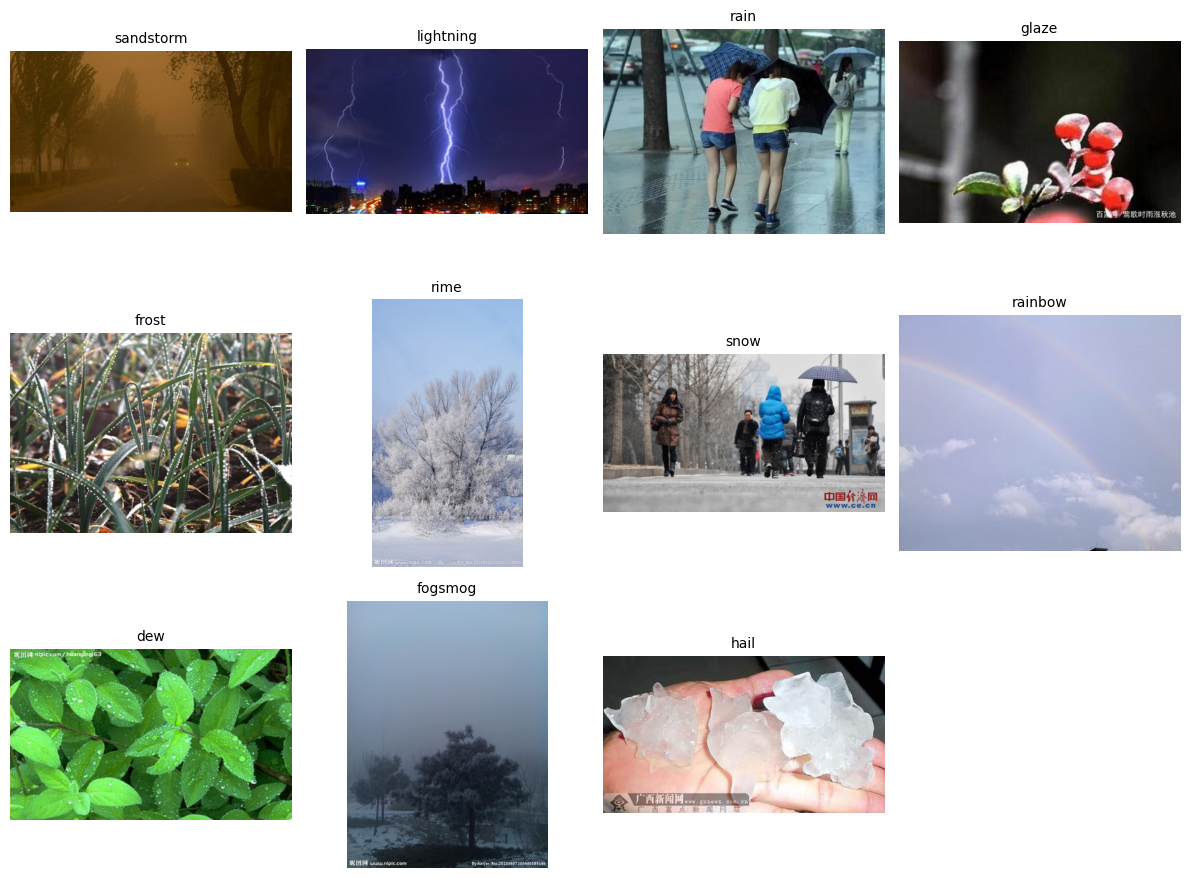

In [12]:
fig = plt.figure(figsize=(12, 9))
rows = 3
columns = 4
path = '/content/dataset/test'  # Specify your path here

# Get all image directories
image_directories = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]

for i, image_dir in enumerate(image_directories):
    image_dir_path = os.path.join(path, image_dir)
    # Get all files in the directory and filter out directories
    image_files = [f for f in os.listdir(image_dir_path) if os.path.isfile(os.path.join(image_dir_path, f))]

    if image_files:
        first_img_path = image_files[0]
        first_image = imread(os.path.join(image_dir_path, first_img_path))
        ax = fig.add_subplot(rows, columns, i + 1)
        ax.axis('off')
        ax.imshow(first_image)
        ax.set_title('{}'.format(image_dir), fontsize=10)

plt.tight_layout()
plt.show()

In [13]:
dim1 = []    # width
dim2 = []    # height
colors = []  # color channel

for i, image_filename in enumerate(os.listdir(path)):

    subfolders_path = os.path.join(path, image_filename)
    print(subfolders_path)

    for image_path in os.listdir(subfolders_path):

        image = imread(os.path.join(subfolders_path,image_path))

        # handling gray scale images if any
        if len(image.shape) < 3:
            image = image.reshape(image.shape+(1,))

        d1,d2,color = image.shape
        dim1.append(d1)
        dim2.append(d2)
        colors.append(color)

/content/dataset/test/sandstorm
/content/dataset/test/lightning
/content/dataset/test/rain
/content/dataset/test/glaze
/content/dataset/test/frost
/content/dataset/test/rime
/content/dataset/test/snow
/content/dataset/test/rainbow
/content/dataset/test/dew
/content/dataset/test/fogsmog
/content/dataset/test/hail


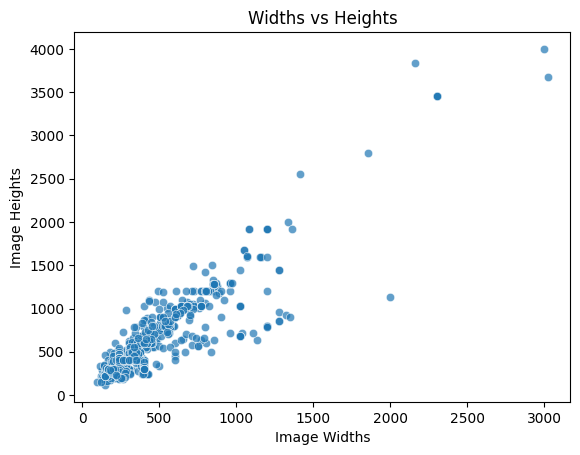

In [14]:
sns.scatterplot(x=dim1, y=dim2, alpha = 0.7)
plt.xlabel('Image Widths')
plt.ylabel('Image Heights')
plt.title('Widths vs Heights');

In [15]:
np.mean(dim1)

378.9579100145138

In [16]:
np.mean(dim2)

524.266328011611

In [17]:
np.unique(colors)

array([1, 3, 4])

In [18]:
input_shape =  (373,520,3)

In [19]:
all_data_sum=0
images_count_dict = {}
for image_filename in os.listdir(path):

    folder_path = os.path.join(path, image_filename)
    images_count = len(os.listdir(folder_path))
    images_count_dict[image_filename] = images_count
    all_data_sum+= images_count
    print('{} folder has {} images'.format(image_filename ,  images_count))

print("\nTotal Number of Images: {} image".format(all_data_sum))

sandstorm folder has 139 images
lightning folder has 76 images
rain folder has 106 images
glaze folder has 128 images
frost folder has 95 images
rime folder has 232 images
snow folder has 125 images
rainbow folder has 47 images
dew folder has 140 images
fogsmog folder has 171 images
hail folder has 119 images

Total Number of Images: 1378 image


<ipython-input-20-07f3d17c5257>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=[x[0] for x in data], x=[x[1] for x in data], palette='crest',orient='horizontal')


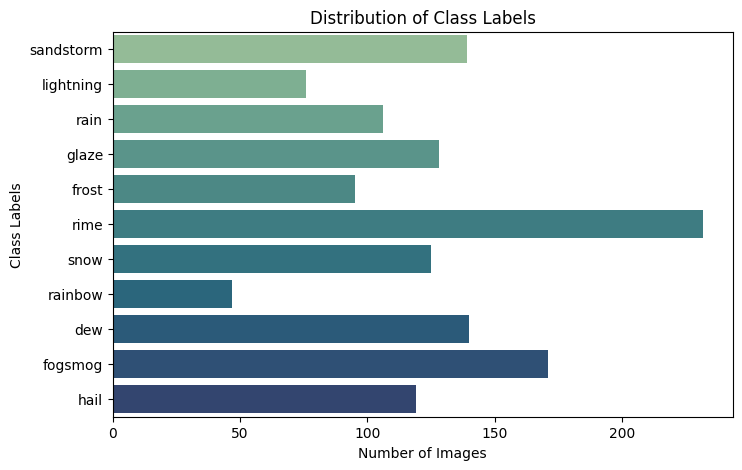

In [20]:
data = list(images_count_dict.items())

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(y=[x[0] for x in data], x=[x[1] for x in data], palette='crest',orient='horizontal')
plt.ylabel('Class Labels')
plt.xlabel('Number of Images')
plt.title('Distribution of Class Labels');

In [21]:
train_path = '/content/dataset/train/'
test_path = '/content/dataset/test/'

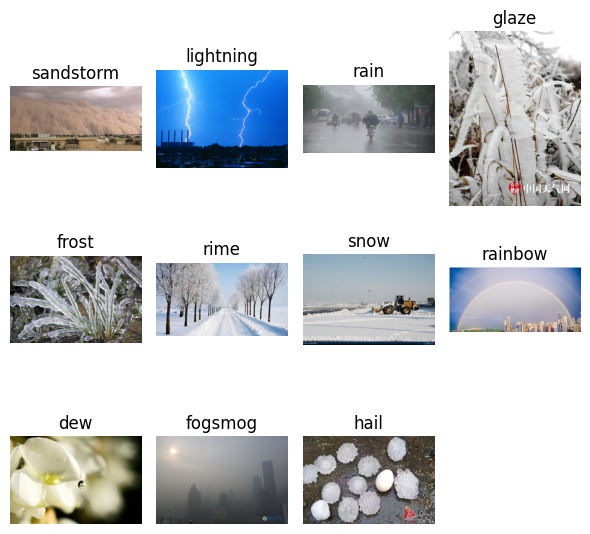

In [22]:
fig = plt.figure(figsize=(6,6))
rows = 3
columns = 4


for i, image_filename in enumerate(os.listdir(train_path)):

    first_img_path = os.listdir(os.path.join(train_path, image_filename))[0]
    first_image = imread(os.path.join(train_path, image_filename, first_img_path))
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.imshow(first_image)
    plt.title('{}'.format(image_filename, fontsize=10))

plt.tight_layout()
plt.show()

In [23]:
all_data_sum=0
images_count_dict = {}
for image_filename in os.listdir(train_path):

    folder_path = os.path.join(train_path, image_filename)
    images_count = len(os.listdir(folder_path))
    images_count_dict[image_filename] = images_count
    all_data_sum+= images_count
    print('{} folder has {} images'.format(image_filename ,  images_count))

print("\nTotal Number of Images: {} image".format(all_data_sum))

sandstorm folder has 553 images
lightning folder has 301 images
rain folder has 420 images
glaze folder has 511 images
frost folder has 380 images
rime folder has 928 images
snow folder has 496 images
rainbow folder has 185 images
dew folder has 558 images
fogsmog folder has 680 images
hail folder has 472 images

Total Number of Images: 5484 image


<ipython-input-24-07f3d17c5257>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=[x[0] for x in data], x=[x[1] for x in data], palette='crest',orient='horizontal')


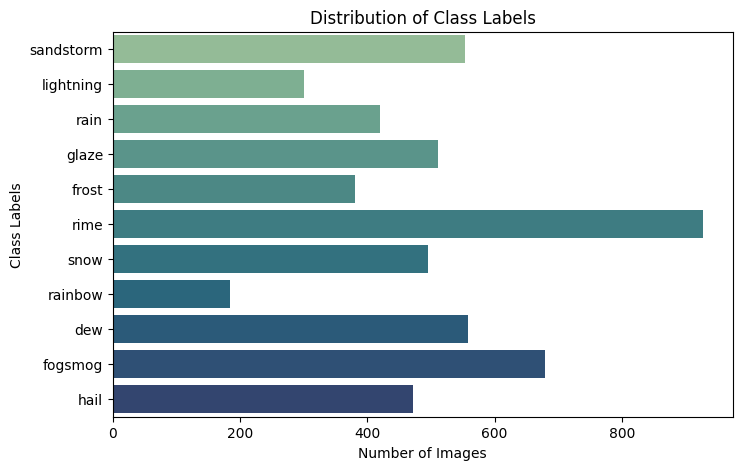

In [24]:
data = list(images_count_dict.items())

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(y=[x[0] for x in data], x=[x[1] for x in data], palette='crest',orient='horizontal')
plt.ylabel('Class Labels')
plt.xlabel('Number of Images')
plt.title('Distribution of Class Labels');

In [25]:
image_shape = (224,224,3)
batch_size = 64
epochs = 100
no_classes = 11

In [26]:
train_image_gen = ImageDataGenerator(rescale=1/255,
                                     validation_split=0.2)

test_image_gen = ImageDataGenerator(rescale=1/255)

In [27]:
train_image_ds = train_image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               subset = 'training')

Found 4390 images belonging to 11 classes.


In [28]:
val_image_ds = train_image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               subset = 'validation')

Found 1094 images belonging to 11 classes.


In [29]:
test_image_ds = test_image_gen.flow_from_directory(test_path,
                                                  target_size=image_shape[:2],
                                                  color_mode='rgb',
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 1378 images belonging to 11 classes.


In [30]:
images, one_hot_labels = next(train_image_ds)
# get the 'one' which is corresponding to target label
labels = np.argmax(one_hot_labels, axis=1)

In [31]:
images[0].max()

1.0

In [32]:
images[0].min()

0.0

In [33]:
dense_model = DenseNet121(weights='imagenet',
                          include_top=True,
                          input_shape = image_shape)

# Remove the final layer (softmax)
dense_model = Model(inputs=dense_model.input, outputs=dense_model.layers[-2].output)

# Freeze Layers
for layer in dense_model.layers:
    layer.trainable = False

# Adding a dropout layer
dropout_layer = Dropout(0.4)(dense_model.output)
layer = Dense(64, kernel_regularizer=L1(1e-7))

# Adding batch normalization
batch_norm_layer = BatchNormalization()(dropout_layer)

activation = Activation('relu')(batch_norm_layer)

# Adding our custom layer for our specific task
output = Dense(no_classes, activation='softmax')(activation)

# Define our model with the modified output layer
model = Model(inputs=dense_model.input, outputs=output)

model.summary()

33188688/33188688 [==============================] - 3s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati

In [34]:
early_stop = EarlyStopping(monitor='val_loss', patience = 2, restore_best_weights=True )

In [35]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_image_ds,
                    epochs=epochs,
                    validation_data=val_image_ds,
                    callbacks=[early_stop])

Epoch 1/100
69/69 [==============================] - 58s 593ms/step - loss: 1.6434 - accuracy: 0.4617 - val_loss: 1.0470 - val_accuracy: 0.6910
Epoch 2/100
69/69 [==============================] - 29s 417ms/step - loss: 0.8934 - accuracy: 0.7118 - val_loss: 0.8360 - val_accuracy: 0.7770
Epoch 3/100
69/69 [==============================] - 34s 496ms/step - loss: 0.7025 - accuracy: 0.7658 - val_loss: 0.7635 - val_accuracy: 0.8053
Epoch 4/100
69/69 [==============================] - 29s 414ms/step - loss: 0.6173 - accuracy: 0.7957 - val_loss: 0.6947 - val_accuracy: 0.8208
Epoch 5/100
69/69 [==============================] - 28s 407ms/step - loss: 0.5600 - accuracy: 0.8082 - val_loss: 0.6519 - val_accuracy: 0.8300
Epoch 6/100
69/69 [==============================] - 27s 398ms/step - loss: 0.5110 - accuracy: 0.8289 - val_loss: 0.6223 - val_accuracy: 0.8199
Epoch 7/100
69/69 [==============================] - 28s 406ms/step - loss: 0.4882 - accuracy: 0.8394 - val_loss: 0.5773 - val_accuracy:

In [36]:
model.evaluate(val_image_ds,verbose=0)

[0.42843401432037354, 0.8455210328102112]

In [37]:
model.evaluate(test_image_ds,verbose=0)

[0.41417837142944336, 0.8686501979827881]

In [38]:
test_loss, test_accuracy = model.evaluate(test_image_ds, verbose=2)

print("Test Accuracy: ", test_accuracy)
print("Test Loss: ", test_loss)

22/22 - 7s - loss: 0.4142 - accuracy: 0.8687 - 7s/epoch - 300ms/step
Test Accuracy:  0.8686501979827881
Test Loss:  0.41417837142944336


In [39]:
predictions_prob = model.predict(test_image_ds,verbose=0)

In [40]:
predictions = np.argmax(predictions_prob, axis=1)

In [41]:
print(classification_report(test_image_ds.classes,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       140
           1       0.86      0.90      0.88       171
           2       0.81      0.78      0.80        95
           3       0.72      0.71      0.72       128
           4       0.97      0.96      0.96       119
           5       0.99      1.00      0.99        76
           6       0.84      0.92      0.88       106
           7       1.00      1.00      1.00        47
           8       0.83      0.91      0.86       232
           9       0.89      0.82      0.85       139
          10       0.85      0.70      0.77       125

    accuracy                           0.87      1378
   macro avg       0.88      0.88      0.88      1378
weighted avg       0.87      0.87      0.87      1378



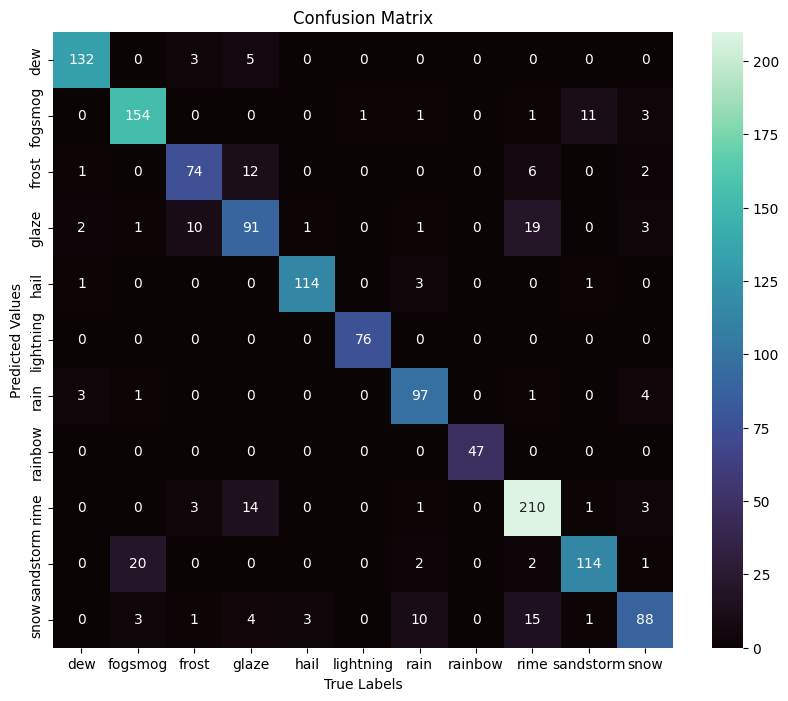

In [42]:
plt.figure(figsize=(10,8))
cm = confusion_matrix(test_image_ds.classes,predictions)
ax = sns.heatmap(cm,annot=True,fmt='d',cmap='mako')
ax.set_xticklabels(test_image_ds.class_indices.keys())
ax.set_yticklabels(test_image_ds.class_indices.keys())

plt.xlabel('True Labels')
plt.ylabel('Predicted Values')
plt.title('Confusion Matrix');

In [43]:
metrics = pd.DataFrame(history.history)

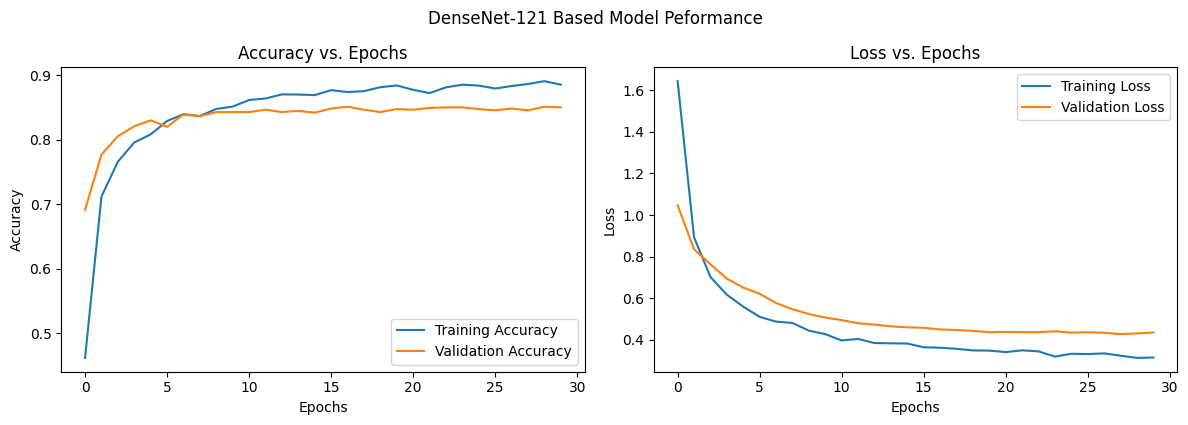

In [44]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(metrics['accuracy'], label='Training Accuracy')
plt.plot(metrics['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy vs. Epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(metrics['loss'], label='Training Loss')
plt.plot(metrics['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss vs. Epochs")
plt.legend()
plt.tight_layout()
plt.suptitle('DenseNet-121 Based Model Peformance', y = 1.05)
plt.show()

In [45]:
model.save('Weather_Densenet-121.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
